In [1]:
using Pkg
Pkg.add("Plots")
Pkg.add("Roots")
Pkg.add("Interpolations")
Pkg.add("NonlinearSolve")
Pkg.add("LaTeXStrings")
using Plots, Roots, Interpolations, NonlinearSolve

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
   Installed CompositionsBase ─ v0.1.2
   Installed Accessors ──────── v0.1.42
   Installed CommonSolve ────── v0.2.4
   Installed Roots ──────────── v2.2.7
    Updating `~/.julia/environments/v1.10/Project.toml`
  [f2b01f46] + Roots v2.2.7
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [7d9f7c33] + Accessors v0.1.42
  [38540f10] + CommonSolve v0.2.4
  [a33af91c] + CompositionsBase v0.1.2
  [f2b01f46] + Roots v2.2.7
Precompiling packages...
   1476.0 ms  ✓ CommonSolve
   1005.4 ms  ✓ CompositionsBase
    510.0 ms  ✓ CompositionsBase → CompositionsBaseInverseFunctionsExt
   2990.1 ms  ✓ Accessors
    645.3 ms  ✓ Accessors → LinearAlgebraExt
   1385.6 ms  ✓ Accessors → IntervalSetsExt
   1397.9 ms  ✓ Accessors → StructArraysExt
   1562

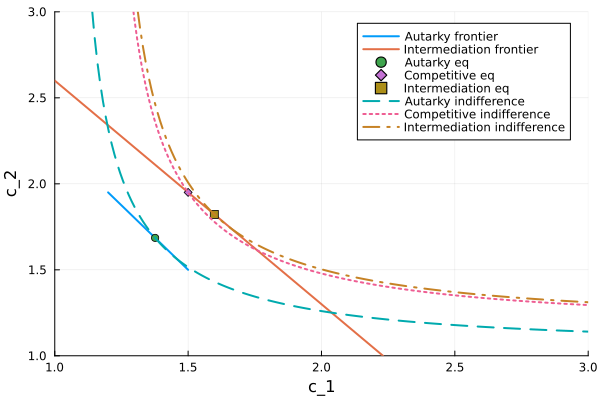

"/content/feasible_sets_and_indiff.png"

In [13]:
using Plots
gr()             # ← pi_parack the GR backend so dashes actually work
default(linewidth=2)
# Parameters
B = 1.5          # initial endowment
R = 1.3          # return in period 2
L = 0.8          # liquidation return in period 1
sigma = 3            # CRRA parameter
pi_para = 0.5          # probability of impatient type

# Utility function
u(c) = c^(1 - sigma) / (1 - sigma)

# Feasible‐set functions
c1_aut(x) = B + (L - 1)*x
c2_aut(x) = B + (R - 1)*x

c1_int(x) = (B - x)/pi_para
c2_int(x) = R*x/(1 - pi_para)

# Generate frontier curves
xs = range(0, stop=B, length=200)
c1_a = c1_aut.(xs)
c2_a = c2_aut.(xs)
c1_i = c1_int.(xs)
c2_i = c2_int.(xs)

# (a) Autarky equilibrium via FOC: (B - x)/x = sqrt((R - 1)/(1 - L))
Y    = (R - 1)/(1 - L)
x_aut = B * (1 - sqrt(Y)) / ((L - 1)*sqrt(Y) - (R - 1))
c1_aut_eq = c1_aut(x_aut)
c2_aut_eq = c2_aut(x_aut)

# (b) Competitive (no intermediation)
c1_comp_eq = B
c2_comp_eq = R*B

# (c) Financial intermediation equilibrium: (B - x)/x = sqrt(R)
x_int      = B/(1 + sqrt(R))
c1_int_eq  = c1_int(x_int)
c2_int_eq  = c2_int(x_int)

# Compute expected utilities
EU_aut  = pi_para*u(c1_aut_eq)  + (1 - pi_para)*u(c2_aut_eq)
EU_comp = pi_para*u(c1_comp_eq) + (1 - pi_para)*u(c2_comp_eq)
EU_int  = pi_para*u(c1_int_eq)  + (1 - pi_para)*u(c2_int_eq)

# Plot feasible frontiers
plt = plot(c1_a, c2_a;
           label="Autarky frontier",
           xlabel="c_1",
           ylabel="c_2",
           ylims = (1,3), xlims = (1,3),
           legend=:topright)

plot!(plt, c1_i, c2_i; label="Intermediation frontier")

# Mark equilibrium points
scatter!(plt, [c1_aut_eq],  [c2_aut_eq];  label="Autarky eq",     marker=:circle)
scatter!(plt, [c1_comp_eq], [c2_comp_eq]; label="Competitive eq", marker=:diamond)
scatter!(plt, [c1_int_eq],  [c2_int_eq];  label="Intermediation eq", marker=:square)

# Function to generate an indifference curve for a given EU level
function indifference_curve(EU; c1_min=0.1, c1_max=maximum(vcat(c1_a, c1_i))*1.1)
    c1_vals = range(c1_min, stop=c1_max, length=300)
    c2_vals = [ begin
        val = (1 - sigma)*2*EU - c1^(1 - sigma)
        val > 0 ? val^(1/(1 - sigma)) : NaN
    end for c1 in c1_vals ]
    return c1_vals, c2_vals
end

# Add indifference curves
c1_ia, c2_ia = indifference_curve(EU_aut)
c1_ic, c2_ic = indifference_curve(EU_comp)
c1_ii, c2_ii = indifference_curve(EU_int)

plot!(plt, c1_ia, c2_ia;
      linestyle = :dash,
      label     = "Autarky indifference")

plot!(plt, c1_ic, c2_ic;
      linestyle = :dot,
      label     = "Competitive indifference")

plot!(plt, c1_ii, c2_ii;
      linestyle = :dashdot,
      label     = "Intermediation indifference")

display(plt)
savefig(plt, "feasible_sets_and_indiff.png")